In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [3]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Text(0.5, 0, 'Type of Restaurent')

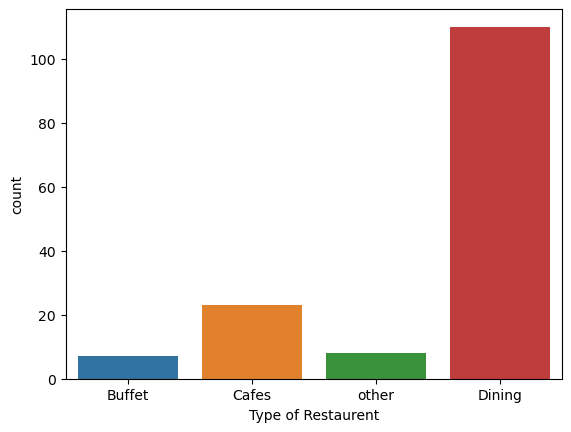

In [4]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of Restaurent")

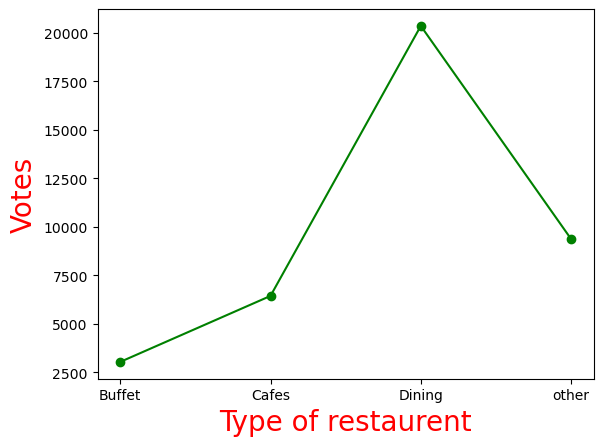

In [5]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result ,c='green', marker='o')
plt.xlabel("Type of restaurent", c='red', size=20)
plt.ylabel("Votes", c="red", size=20)
plt.show()

Restaurent (s) with max. votes: 
38    Empire Restaurant
Name: name, dtype: object


<AxesSubplot:xlabel='online_order', ylabel='count'>

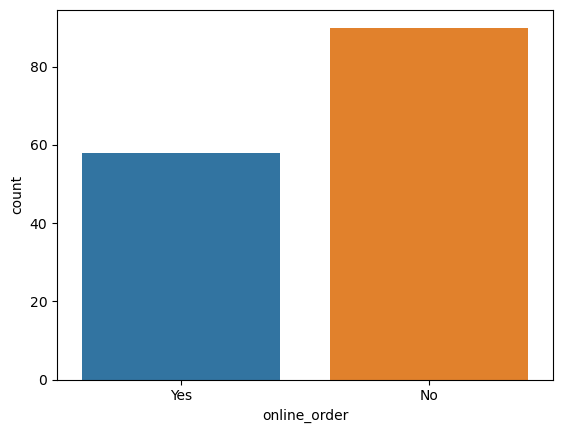

In [6]:
max_votes = dataframe['votes'].max()
restaurent_max_votes = dataframe.loc[dataframe['votes'] == max_votes,"name"]
print("Restaurent (s) with max. votes: ")
print(restaurent_max_votes)
sns.countplot(x=dataframe['online_order'])

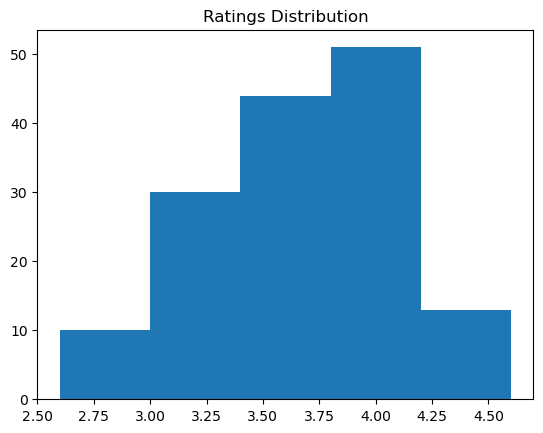

In [7]:
plt.hist(dataframe['rate'], bins=5)
plt.title("Ratings Distribution")
plt.show()

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='count'>

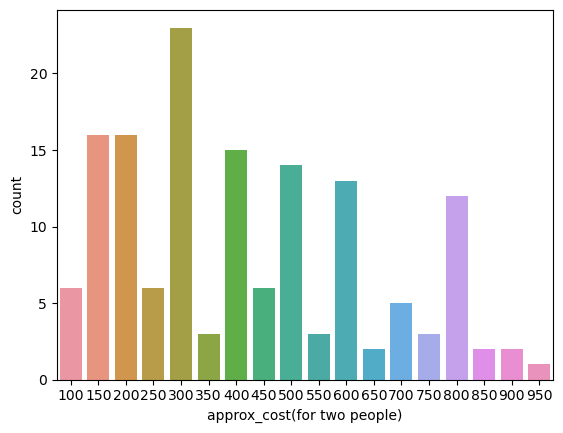

In [8]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

<AxesSubplot:xlabel='online_order', ylabel='rate'>

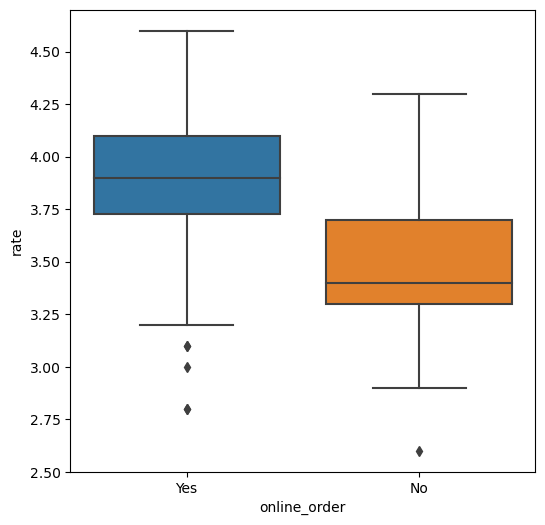

In [9]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y='rate', data = dataframe)

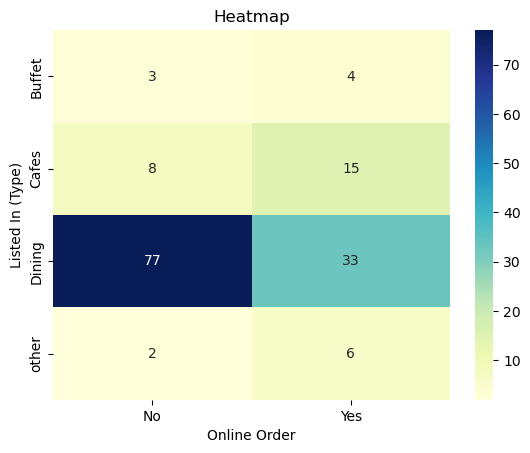

In [11]:
pivot_table = dataframe.pivot_table(index = 'listed_in(type)', columns='online_order', aggfunc = 'size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()